# Domae Line 2 M01 Laser marking
4-Aug-2020

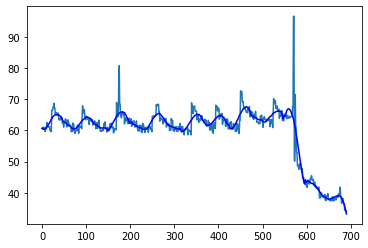

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

data = pd.read_csv('Insight Data 20200128_132638_data_train.csv')
#data.head()
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data) 
# select two columns 
df[['DateTime', 'Value']] 
x = df['DateTime'] 
y = df['Value']
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3
pyplot.plot(y)
pyplot.plot(yhat, color='blue')
pyplot.show()


In [3]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
#fig, axes = pyplot.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(y, lags=20, ax=axes[0])
plot_pacf(y, lags=20, ax=axes[1])

NameError: name 'axes' is not defined

In [4]:
from statsmodels.tsa.stattools import adfuller
def Gen_triger(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    pyplot.plot(timeseries, color='blue',label='Original')
    pyplot.plot(rolmean, color='red', label='Rolling Mean')
    pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean and Standard Deviation')
    pyplot.show(block=False)
    #perform dickey fuller test  
    print("Predict of Triger to Machine Stop")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    return rolstd

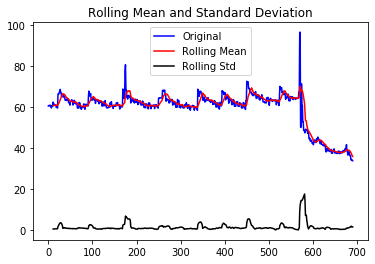

Predict of Triger to Machine Stop
Test Statistics                 -0.785178
p-value                          0.823437
No. of lags used                 4.000000
Number of observations used    686.000000
critical value (1%)             -3.439918
critical value (5%)             -2.865762
critical value (10%)            -2.569019
dtype: float64


In [9]:
y_out = Gen_triger(y)

C:\Users\SESA94921\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SESA94921\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

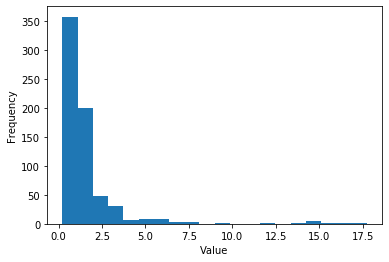

In [8]:
#pyplot.hist(df["Value"],bins=20)
pyplot.hist(y_out,bins=20)
pyplot.xlabel("Value")
pyplot.ylabel("Frequency")